## Step 1: Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data
data = pd.read_csv("StudentsPerformance.csv")

#display first few rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 2: Basic Info & Cleaning

In [2]:
data.info()
data.describe()
data.isnull().sum()   # check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Step 3: Feature Engineering (Optional Total & Average)

In [3]:
#add total & avg score columns
data["total_score"] = data["math score"] + data["reading score"] + data["writing score"]
print("Total Score:\n", data["total_score"])
data["average_score"] = data["total_score"] / 3
print("Average Score:\n", data["average_score"])

Total Score:
 0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64
Average Score:
 0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64


## Step 4: EDA and Answer Tricky Questions

**Q1. Which parental education level is linked with the highest average math score?**

In [4]:
ques_1 = data.groupby("parental level of education")["math score"].mean().sort_values(ascending=False)
print(ques_1)

parental level of education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math score, dtype: float64


**Q2. Is there a significant score difference between males and females across all subjects?**

In [5]:
data.groupby("gender")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


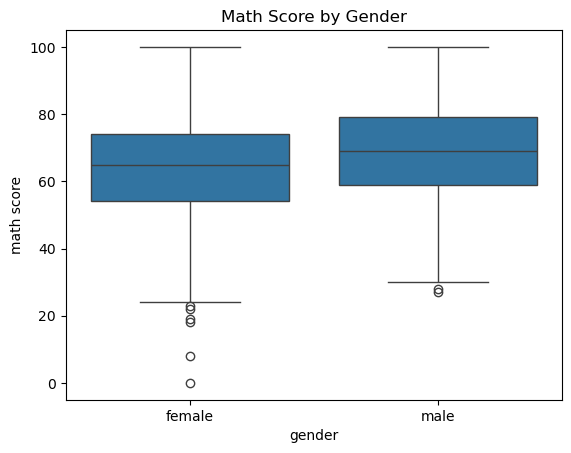

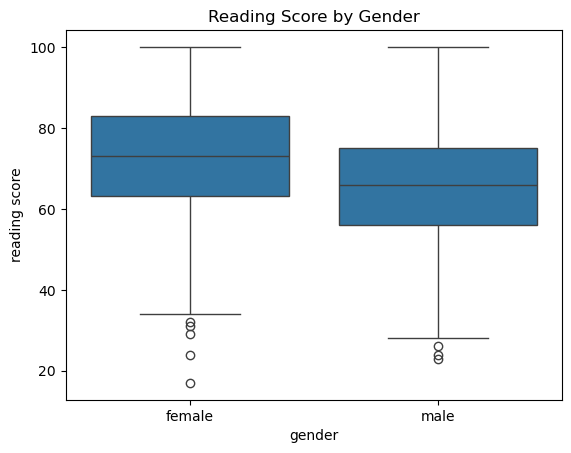

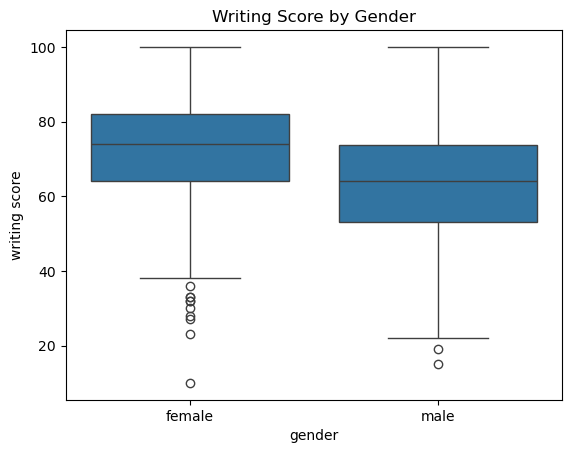

In [6]:
#Visual:
sns.boxplot(data=data, x="gender", y="math score")
plt.title("Math Score by Gender")
plt.show()

sns.boxplot(data=data, x="gender", y="reading score")
plt.title("Reading Score by Gender")
plt.show()

sns.boxplot(data=data, x="gender", y="writing score")
plt.title("Writing Score by Gender")
plt.show()

**Q3. How much does test preparation improve performance?**

In [7]:
data.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


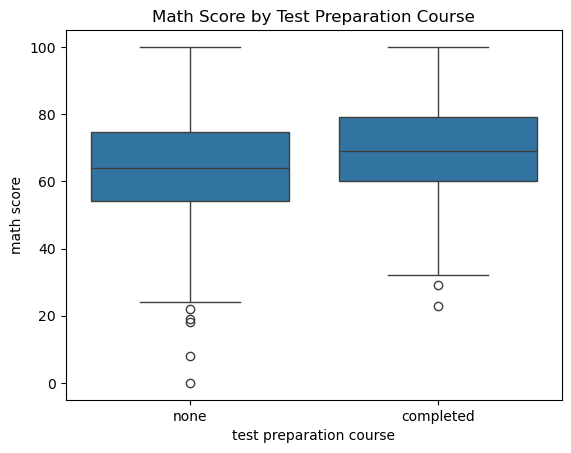

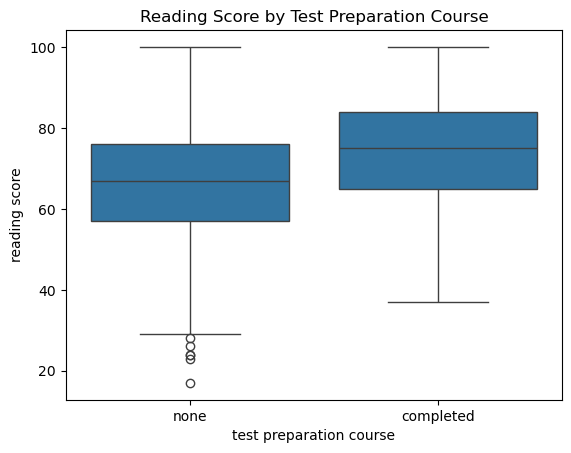

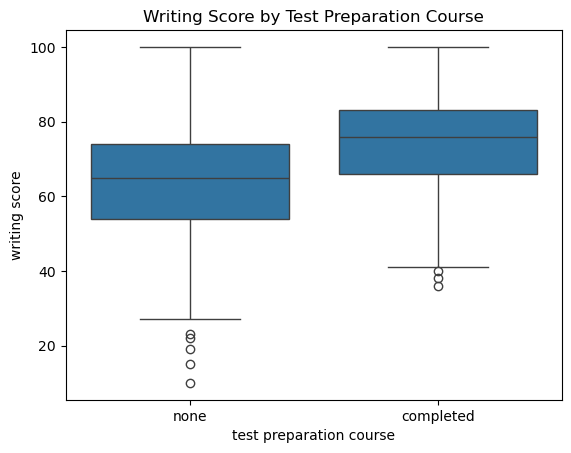

In [8]:
#Visual:
sns.boxplot(data=data, x="test preparation course", y="math score")
plt.title("Math Score by Test Preparation Course")
plt.show()

sns.boxplot(data=data, x="test preparation course", y="reading score")
plt.title("Reading Score by Test Preparation Course")
plt.show()

sns.boxplot(data=data, x="test preparation course", y="writing score")
plt.title("Writing Score by Test Preparation Course")
plt.show()

**Q4. Which combination (gender + lunch + test prep) gives the top 10% scores?**

In [9]:
#get the score that separates the top 10% of students
top_10_cutoff = data["average_score"].quantile(0.9)

#keep only the students whose scores are equal to or above that cutoff
top_students = data[data["average_score"] >= top_10_cutoff]

ques_4 = top_students.groupby(["gender", "lunch", "test preparation course"]).size().sort_values(ascending=False)
print(ques_4)

gender  lunch         test preparation course
female  standard      none                       31
                      completed                  29
male    standard      completed                  20
                      none                        9
female  free/reduced  completed                   6
male    free/reduced  completed                   3
female  free/reduced  none                        2
male    free/reduced  none                        2
dtype: int64


**Q5. Does lunch type affect all races equally?**

lunch           free/reduced   standard
race/ethnicity                         
group A            57.657407  66.616352
group B            60.975845  68.030303
group C            60.412281  70.868293
group D            64.666667  71.746507
group E            67.495935  74.929293


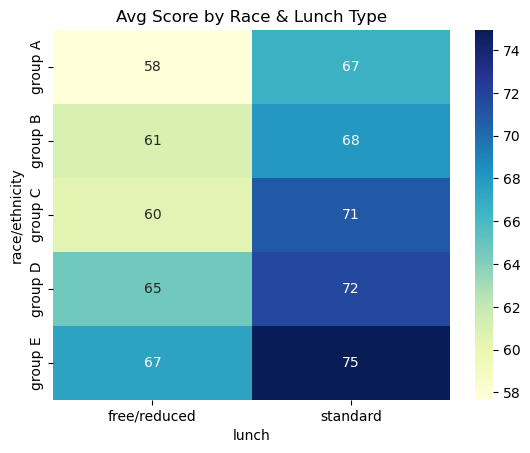

In [10]:
avg = data.groupby(["race/ethnicity", "lunch"])["average_score"].mean().unstack()
print(avg)

# Heatmap
sns.heatmap(avg, annot=True, cmap='YlGnBu')
plt.title("Avg Score by Race & Lunch Type")
plt.show()


**Q6. Correlation between reading-writing vs math-writing?**

               reading score  writing score  math score
reading score       1.000000       0.954598    0.817580
writing score       0.954598       1.000000    0.802642
math score          0.817580       0.802642    1.000000


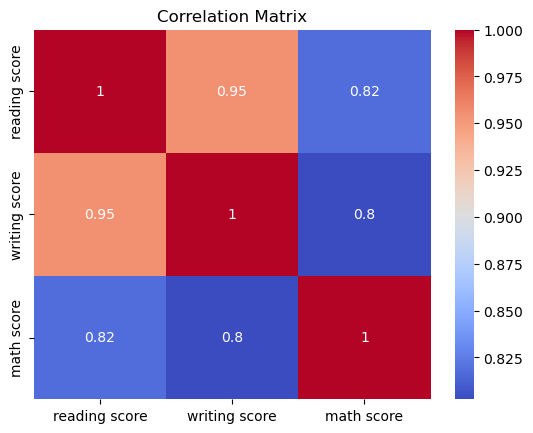

In [11]:
print(data[["reading score", "writing score", "math score"]].corr())

sns.heatmap(data[["reading score", "writing score", "math score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Q7. Top 5% students’ profile?**

In [12]:
top_5_students_profile = data[data["average_score"] >= data["average_score"].quantile(0.95)]
print(top_5_students_profile["gender"].value_counts())
print(top_5_students_profile["parental level of education"].value_counts())

gender
female    36
male      14
Name: count, dtype: int64
parental level of education
associate's degree    16
bachelor's degree     13
some college          10
master's degree        6
some high school       3
high school            2
Name: count, dtype: int64


**Q8. Can we cluster into low/med/high performers using Pandas?**

Yes

In [13]:
#define categories based on average score
def categorize(score):
    if score >= 80:
        return "High"
    elif score >= 60:
        return "Medium"
    else:
        return "Low"

data["performance_category"] = data["average_score"].apply(categorize)

data["performance_category"].value_counts()


performance_category
Medium    517
Low       285
High      198
Name: count, dtype: int64

In [15]:
data.to_csv("Cleaned_StudentPerformance.csv", index=False)